In [5]:
from tqdm import tqdm_notebook
import jpype

# <font color="#5cb85c">꼬꼬마 엔진</font>



In [2]:
from konlpy.tag import Kkma #첫번째 K는 대문자

kkma = Kkma()

In [7]:
kkma.sentences("그때는 내일이 아니라 오늘이더라.")

['그때는 내일이 아니라 오늘이더라.']

In [8]:
kkma.nouns("그때는 내일이 아니라 오늘이더라.")

['그때', '내일', '오늘']

In [9]:
kkma.pos("그때는 내일이 아니라 오늘이더라.")

[('그때', 'NNG'),
 ('는', 'JX'),
 ('내일', 'NNG'),
 ('이', 'JKC'),
 ('아니', 'VCN'),
 ('라', 'ECD'),
 ('오늘', 'NNG'),
 ('이', 'VCP'),
 ('더라', 'EFN'),
 ('.', 'SF')]

# <font color="#5cb85c">한나눔 엔진</font>

In [10]:
from konlpy.tag import Hannanum
han = Hannanum()

In [12]:
han.nouns("그때는 내일이 아니라 오늘이더라.")

['그때', '내일', '오늘']

In [13]:
han.morphs('그때는 내일이 아니라 오늘이더라.')

['그때', '는', '내일', '이', '아니', '라', '오늘', '이', '더라', '.']

In [14]:
han.pos("그때는 내일이 아니라 오늘이더라.")

[('그때', 'N'),
 ('는', 'J'),
 ('내일', 'N'),
 ('이', 'J'),
 ('아니', 'P'),
 ('라', 'E'),
 ('오늘', 'N'),
 ('이', 'J'),
 ('더라', 'E'),
 ('.', 'S')]

# <font color="#5cb85c">Twitter</font>

Twitter에서 Okt로 바뀌었다. (KoNLPy v 0.4.5부터)

In [16]:
# from konlpy.tag import Twitter
from konlpy.tag import Okt
t = Okt()

In [17]:
t.nouns("그때는 내일이 아니라 오늘이더라.")

['그때', '내일', '오늘이', '더']

In [18]:
t.morphs("그때는 내일이 아니라 오늘이더라.")

['그때', '는', '내일', '이', '아니라', '오늘이', '더', '라', '.']

In [19]:
t.pos("그때는 내일이 아니라 오늘이더라.")

[('그때', 'Noun'),
 ('는', 'Josa'),
 ('내일', 'Noun'),
 ('이', 'Josa'),
 ('아니라', 'Adjective'),
 ('오늘이', 'Noun'),
 ('더', 'Noun'),
 ('라', 'Josa'),
 ('.', 'Punctuation')]

# <font color="#5cb85c">워드 클라우드</font>

In [6]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image #Pillow 

In [44]:
with open('dataset/alice.txt') as f :
    txt = f.read()
    alice_mask = np.array(Image.open('dataset/alice.png'))

#### 불용어 제거

In [45]:
stopwords = set(STOPWORDS)
stopwords.add("said") 

#### matplotlib 한글 폰트 설정

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import platform 

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system. Sooooorry.')

%matplotlib inline

#### Show me the Alice

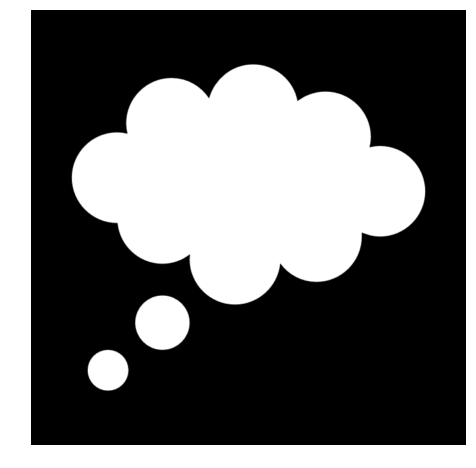

In [47]:
plt.figure(figsize=(8, 8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 단어 빈도 수 구하기 

In [48]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wc = wc.generate(txt)
wc.words_

{'Alice': 0.8,
 'Oh': 0.4,
 'Rabbit': 1.0,
 'White': 0.2,
 'across': 0.4,
 'actually': 0.2,
 'afterwards': 0.2,
 'bank': 0.2,
 'beginning': 0.2,
 'book': 0.4,
 'burning': 0.2,
 'chain': 0.2,
 'close': 0.2,
 'considering': 0.2,
 'conversation': 0.4,
 'curiosity': 0.2,
 'daisies': 0.2,
 'daisy': 0.2,
 'day': 0.2,
 'dear': 0.4,
 'either': 0.2,
 'eyes': 0.2,
 'feel': 0.2,
 'feet': 0.2,
 'field': 0.2,
 'flashed': 0.2,
 'fortunately': 0.2,
 'getting': 0.2,
 'hear': 0.2,
 'hedge': 0.2,
 'hole': 0.2,
 'hot': 0.2,
 'hurried': 0.2,
 'large': 0.2,
 'late': 0.2,
 'looked': 0.2,
 'made': 0.2,
 'making': 0.2,
 'mind': 0.4,
 'much': 0.2,
 'natural': 0.2,
 'never': 0.2,
 'nothing': 0.4,
 'occurred': 0.2,
 'peeped': 0.2,
 'picking': 0.2,
 'pictures': 0.4,
 'pink': 0.2,
 'pleasure': 0.2,
 'pocket': 0.4,
 'pop': 0.2,
 'quite': 0.2,
 'ran': 0.4,
 'reading': 0.2,
 'remarkable': 0.2,
 'say': 0.2,
 'see': 0.2,
 'seemed': 0.2,
 'seen': 0.2,
 'sister': 0.4,
 'sitting': 0.2,
 'sleepy': 0.2,
 'started': 0.2,
 's

#### 배경 색 채우기 

In [50]:
#wc 처음 생성할 때 background_color='white'로 설정하면 안 먹히니까 주의
default_colors = wc.to_array()

In [51]:
import random
def gray_color_func(word, font_size, position, orientation, random_state=None, **kwargs) :
    return 'hsl(0, 0%%, %d%%)' %random.randint(60,100)

#### 그리기

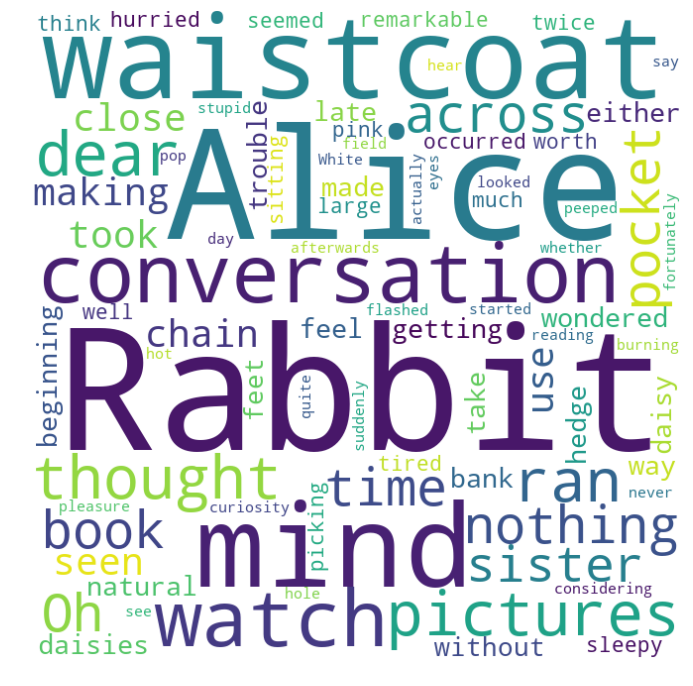

In [52]:
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# <font color="#5cb85c">한국어 분석</font>

In [53]:
import nltk 

In [59]:
from konlpy.corpus import kobill

files_ko = kobill.fileids()

with kobill.open('1809890.txt') as f : 
    doc_ko = f.read()

In [61]:
from konlpy.tag import Okt

t = Okt()
tokens = t.nouns(doc_ko)
tokens

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

#### 키워드 카운트, 고유 횟수 확인

In [75]:
ko = nltk.Text(tokens, name='대한민국 국회 의안 제 1809890호')

In [76]:
print(len(ko.tokens))      #returns number of tokens (document length)
print(len(set(ko.tokens))) #returns number of unique tokens
ko.vocab()                 #returns frquency distribution

735
250


FreqDist({'육아휴직': 38, '발생': 19, '이하': 18, '만': 18, '액': 17, '비용': 17, '세': 16, '경우': 16, '고용': 14, '자녀': 14, ...})

#### 시각화

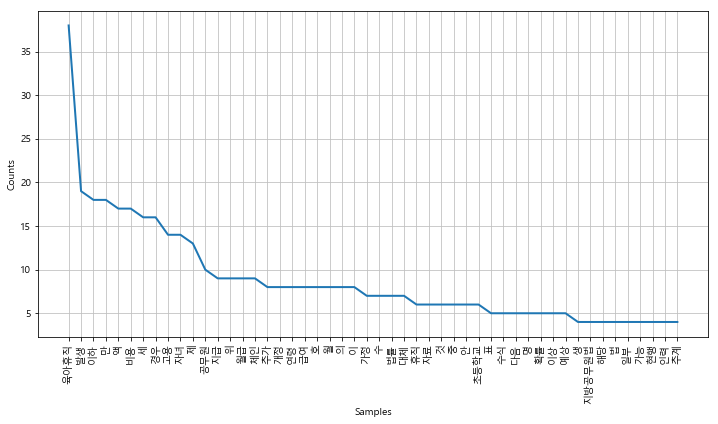

In [77]:
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

In [78]:
stop_words = ['.', '(', ')', ',', "'",'%', '-', 'X', 'x', '의', '자', '에', '안', '번', '호', '을', '이', '의', '안', '세', '것', '를', '위', '만', '액']

In [79]:
ko = [each_word for each_word in ko if each_word not in stop_words]

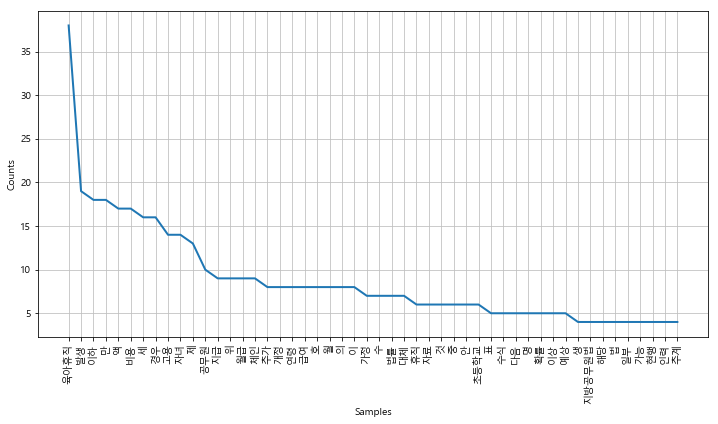

In [80]:
ko = nltk.Text(tokens, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

In [81]:
ko.count('육아휴직')

38

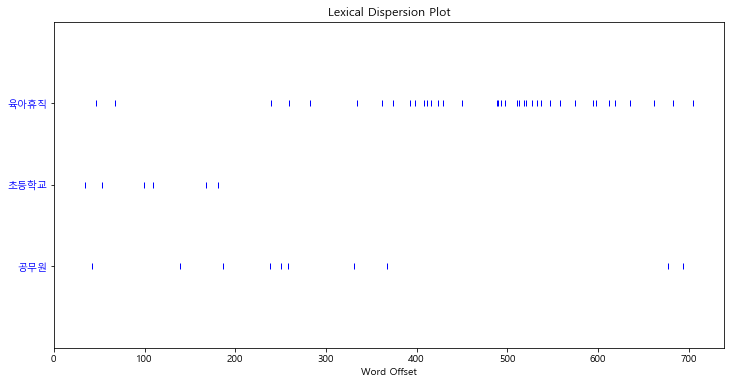

In [82]:
plt.figure(figsize=(12, 6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

#### 위치 파악

In [83]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
규 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아휴
나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 만 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것
 법률 안 지방공무원법 일부 다음 개정 제 항제 호 중 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말 
중 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말 의 자녀 로 부 칙 이 법 공포 날 시행 신 구조 문
 제 호 의 경우 대통령령 정 사정 직 명 생 략 현행 만 세 이하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년
이하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 의 자녀 임신 출산 때 생 략 생 략


In [84]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


#### 워드클라우드

<function matplotlib.pyplot.show(*args, **kw)>

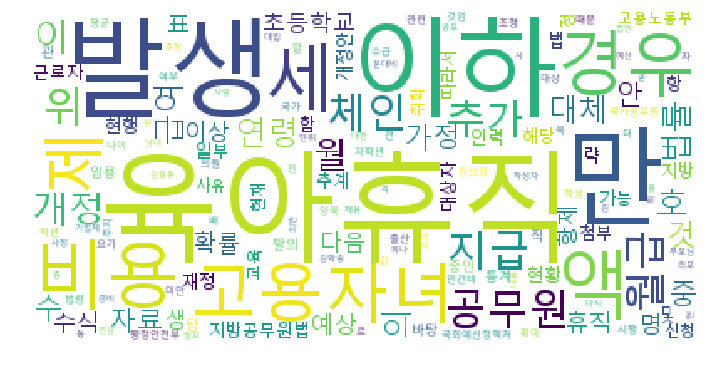

In [87]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

# <font color="#5cb85c">Naive Bayes Classifier</font>

두 사건을 독립이라고 가정. 각각의 조건부 확률을 구한다.

긍정, 부정을 나누는 키워드 단어를 설정

In [88]:
from nltk.tokenize import word_tokenize
import nltk

In [89]:
train = [
    ('i like you', 'pos'),
    ('i hate you', 'neg'),
    ('you like me', 'neg'),
    ('i like her', 'pos'),
]

In [90]:
all_words = set(word.lower() for sentence in train
                                   for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

all_words를 기준으로 train 문장의 단어가 있다면 True, 없으면 False

In [91]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                             for x in train]
t

[({'hate': False,
   'her': False,
   'i': True,
   'like': True,
   'me': False,
   'you': True},
  'pos'),
 ({'hate': True,
   'her': False,
   'i': True,
   'like': False,
   'me': False,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': False,
   'i': False,
   'like': True,
   'me': True,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': True,
   'i': True,
   'like': True,
   'me': False,
   'you': False},
  'pos')]

#### Naive Bayes 분류기 사용 

hate가 문장에 없을 때 긍정적인 단어일 확률 1.7

In [93]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                     you = True              neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0


#### Test

In [94]:
test_senctence = 'i like Merui'

In [95]:
test_sent_features = {word.lower() : 
                         (word in word_tokenize(test_senctence.lower()))
                         for word in all_words}
test_sent_features

{'hate': False,
 'her': False,
 'i': True,
 'like': True,
 'me': False,
 'you': False}

In [96]:
classifier.classify(test_sent_features)

'pos'

# <font color="#5cb85c">Naive Bayes Classifier - 한글</font>

In [2]:
from konlpy.tag import Okt
post_tagger = Okt()

In [3]:
train = [
    ('메리가 좋아', 'pos'),
    ('고양이도 좋아', 'pos'),
    ('난 수업이 지루해', 'neg'),
    ('메리는 이쁜 고양이야', 'pos'),
    ('난 마치고 메리랑 놀거야', 'pos'),
]

In [4]:
all_words = set(word.lower() for sentence in train
                               for word in word_tokenize(sentence[0]))

all_words

NameError: name 'word_tokenize' is not defined

학습 시키기

In [102]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                             for x in train]
t

[({'고양이도': False,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': True,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': True,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': True,
   '이쁜': False,
   '좋아': False,
   '지루해': True},
  'neg'),
 ({'고양이도': False,
   '고양이야': True,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': True,
   '메리랑': False,
   '수업이': False,
   '이쁜': True,
   '좋아': False,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': True,
   '마치고': True,
   '메리가': False,
   '메리는': False,
   '메리랑': True,
   '수업이': False,
   '이쁜': 

In [103]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0


In [104]:
test_senctence = '난 수업이 끝나면 메리랑 놀거야'

In [105]:
test_sent_features = {word.lower() : 
                         (word in word_tokenize(test_senctence.lower()))
                         for word in all_words}
test_sent_features

{'고양이도': False,
 '고양이야': False,
 '난': True,
 '놀거야': True,
 '마치고': False,
 '메리가': False,
 '메리는': False,
 '메리랑': True,
 '수업이': True,
 '이쁜': False,
 '좋아': False,
 '지루해': False}

이상한 결과가 나온다.

In [106]:
classifier.classify(test_sent_features)

'neg'

형태소 분석

In [109]:
def tokenize(doc) : 
    return ['/'.join(t) for t in post_tagger.pos(doc, norm=True, stem=True)]

In [111]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

하나의 말뭉치로 묶기 

In [113]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [114]:
def term_exists(doc) : 
    return {word: (word in set(doc)) for word in tokens}

놀랍게도 조사는 Josa라고 뜬다.

In [115]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'가/Josa': True,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': True,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': True,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': True,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': True,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': True,
   '야/Josa': False,
   '이/Josa': True,
   '이쁘다/Adjective': False,


In [116]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [117]:
test_sentence = [("난 수업이 끝나면 메리랑 놀거야")]

형태소 분석

In [120]:
test_docs = post_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('끝나면', 'Verb'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [121]:
test_sent_features = {word :(word in tokens) for word in test_docs}
test_sent_features

{('끝나면', 'Verb'): False,
 ('난', 'Noun'): False,
 ('놀거야', 'Verb'): False,
 ('랑', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False}

In [122]:
classifier.classify(test_sent_features)

'pos'

# <font color="#5cb85c">문장의 유사도 측정하기</font>

문장을 벡터화해서 벡터 간 거리를 구하는 방법으로 유사도를 측정한다.

In [123]:
#텍스트의 특징을 추출하는 모듈
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
vectorizer = CountVectorizer(min_df=1)

In [125]:
contents = [
    '메리랑 놀러가고 싶지만 바쁜데 어떡하죠?',
    '메리는 공원에서 산책하고 노는 것을 싫어해요',
    '메리는 공원에서 노는 것을 싫어해요. 이상해요',
    '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요',
]

'메리랑', '메리는'을 구분하지 못한다.

In [126]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '여행을',
 '이상해요',
 '있어요']

In [127]:
from konlpy.tag import Okt
t = Okt()

In [128]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떡하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '을', '싫어해요', '.', '이상해요'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [130]:
contents_for_vectorize = []

for content in contents_tokens :
    sentence = ''
    
    for word in content : 
        sentence = sentence + ' ' + word
    
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떡하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 을 싫어해요 . 이상해요',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

feature를 찾도록 한다.

In [131]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [132]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

벡터화

In [133]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [134]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']

In [135]:
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens : 
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [136]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [137]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [138]:
import scipy as sp

def dist_raw(v1, v2) :
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [140]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples) :
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f : %s" %(i, d, contents[i]))
    
    if d < best_dist :
        best_dist = d
        best_i = i

== Post 0 with dist=3.00 : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.00 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00 : 메리는 공원에서 노는 것을 싫어해요. 이상해요
== Post 3 with dist=3.46 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [142]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('--->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [143]:
for i in range(0, len(contents)) :
    print(X.getrow(i).toarray())
    
    print("--------------------")
    print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
--------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
--------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
--------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
--------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [144]:
def dist_norm(v1, v2) :
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())  
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [145]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples) :
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f : %s" %(i, d, contents[i]))
    
    if d < best_dist :
        best_dist = d
        best_i = i

== Post 0 with dist=1.28 : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=0.42 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89 : 메리는 공원에서 노는 것을 싫어해요. 이상해요
== Post 3 with dist=1.30 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [146]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('--->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


#### 단어별로 가중치 부과하기

tfidf : tf(term frequency), idf(inverse document frequency)

In [148]:
def tfidf(t, d, D) :
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D)) / (len([doc for doc in D if t in doc])) )
    
    return tf, idf

In [149]:
a, abb, abc = ['a'], ['a','b','b'], ['a', 'b', 'c']
D = [a, abb, abc]

모든 문장에 a가 있기 때문에 idf의 결과가 0 

In [150]:
print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [152]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens : 
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [154]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [155]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens : 
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요']

In [156]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [157]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples) :
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f : %s" %(i, d, contents[i]))
    
    if d < best_dist :
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('--->', contents[best_i])

== Post 0 with dist=0.90 : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.18 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16 : 메리는 공원에서 노는 것을 싫어해요. 이상해요
== Post 3 with dist=1.41 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요']
---> 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?


# <font color="#5cb85c">여자친구 선물하기</font>

In [8]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt 

%matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system. Sooooorry.')

plt.rcParams['axes.unicode_minus'] = False

In [9]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [10]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'
response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('dl')

In [11]:
tmp_list = []
for line in tmp :
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    까르벵   스마트 마스크   까르벵 시계   여친선물추천   여친 생일선물   파니니백     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  20대중후반 여친선물을 하려고하는데요   2018.11.06.   20대중후반 여친선물을 하려고하는데요 파우더로 하려고해요 그... 솜있는거... 암튼 피부는 굉장히 좋은편이구요 윤기도 있고.. 하얀편이에요 파우더도 바르고요 어떤...   답변 입생로랑 입술바르는거 17.19호 가격대 무난하고 자주쓰는거라 소모가 빨라서 좋아요 고려해보삼 다이아로티하트 목걸이 추천합니다 7만원이고 다이아몬드...      ',
 '  질문  빼빼로데이 여친 선물 추천 어떤게 좋을까요?   2018.10.15.   어떻게 선택을 해야 할지를 모르는데 빼빼로데이 여친선물 추천 부탁드립니다. 처음 여친을 사귀는 거라 어떤것을 해야 할지를 모르겠네요.   답변 빼빼로데이 여친 선물 추천 때문에 질문을 주신거 같으신데요.. 찾아보시면은 빼빼로데이 여친 선물 추천 드리고... 빼빼로데이 다가오면은 여친 선물 하려고 준비를 하는...      ',
 '  질문  여친선물 가방이나 지갑   2018.06.01.   가방이나 지갑봅니다 처음 선물하는거라서 비싼거 주고 싶네요   답변 미국브랜드 보가타 숄더백은 어떠세요~? 제가 선물받아서 잘 쓰고 있는데, 너무 흡족해서 지나가다 추천해드립니다 : ) 친환경브랜드라 가치있는 소비일뿐만아니라 고급...      ',
 '  질문  윤아 선글라스 여친 선물로 사주려고 하는데요   2018.07.10.   선글라스 사줄까 하는데 어디껀지 가격은 어느정도인지 알고싶

In [12]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 10000, 10)) :
    response = urlopen(html.format(num=n,
                                  key_word=urllib.parse.quote('여자친구 선물')))
    
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    
    for line in tmp :
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [13]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구 생일선물   여자 근력운동   여자친구 100일 선물   10대 여자친구 선물   와일드망고   친구 선물   여자친구 목걸이   스킨케어   여자 30대 선물   20대 여자친구 선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  20대 여자친구 선물 센스 좋은 걸로   2019.02.26.   이번에 20대 여자친구 선물을 하려고 하는데~ 너무 똑같은거 말고 조금 센스있는... 뭘 선택해야할지 모르겠는데~ 가격부담도 좀 없는 20대 여자친구 선물 좀 알려주세요~!   답변 요새 기념일도 많다보니까 20대 여자친구 선물을... 저도 이번에 20대 여자친구 선물을 샀었는데 피에라... 20대 여자친구 선물을 할 수 있어서 정말 좋더라구요. 가격이...      ',
 '  질문  여자친구 선물 추천 해주실분~~   4일 전   있으면 여친 생일이라서 차근차근 준비 중이에요. 여자친구 선물 추천 받고 준비하려고 합니다. 여친이 좋아할 만한 것들이 있다면 여자친구 선물 추천 해주심 감사드려요!!   답변 남사친들이 여자친구 선물 추천 부탁할 때면 저는 무조건 이거 여자친구 선물 추천하는데 100이면 100 다들 엄청 좋아하더라고요. 그래서 여자친구 선물 추천해드리고...      ',
 '  질문  여자친구 선물 예쁜거 추천해주세요   2018.10.29.   여자친구 선물로 고민이에요 달랑 과자만 주기에도 그렇고, 고급스러운 걸 같이 주려니... 여자친구 선물로... 과자랑 같이 줄만한 예쁜 여자친구 선물 좀 추천해주세요   답변 여자친구 선물로 뭘줄지 고민이신가보네요 ^^ 하긴... 있고, 여자

In [14]:
import nltk 
from konlpy.tag import Okt; t = Okt()

In [15]:
present_text = ''

for each_line in present_candi_text[:10000] :
    present_text = present_text + each_line + '\n'

In [16]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '여자친구',
 '100일',
 '선물',
 '10',
 '대',
 '여자친구',
 '선물',
 '와일드',
 '망고',
 '친구',
 '선물',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '30',
 '대',
 '선물',
 '20',
 '대',
 '여자친구',
 '선물',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '20',
 '대',
 '여자친구',
 '선물',
 '센스',
 '좋은',
 '걸',
 '로',
 '2019.02',
 '.',
 '26',
 '.',
 '이번',
 '에',
 '20',
 '대',
 '여자친구',
 '선물',
 '을',
 '하려고',
 '하는데',
 '~',
 '너무',
 '똑같은',
 '거',
 '말고',
 '조금',
 '센스',
 '있는',
 '...',
 '뭘',
 '선택',
 '해야',
 '할지',
 '모

In [17]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

665291
393


In [18]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
ko.vocab().most_common(100)

[('선물', 39994),
 ('여자친구', 38455),
 ('.', 26918),
 ('...', 19994),
 ('추천', 14611),
 ('대', 11538),
 ('로', 11536),
 ('답변', 9228),
 ('를', 8462),
 ('20', 8460),
 ('가', 8460),
 ('을', 7690),
 ('질문', 7690),
 ('이', 6152),
 ('여자', 5385),
 ('들', 5383),
 ('고민', 5383),
 ('저', 5383),
 ('도', 5383),
 ('귀걸이', 5383),
 ('좀', 5383),
 ('는', 4615),
 ('화장품', 4614),
 ('단어', 3850),
 ('?', 3846),
 ('한', 3846),
 ('에', 3845),
 ('해주세요', 3845),
 ('검색', 3080),
 ('하는', 3079),
 ('의', 3078),
 ('목걸이', 3077),
 ('후', 3077),
 ('인데', 3076),
 (',', 3076),
 ('하는데', 3076),
 ('중', 3076),
 ('나이', 3076),
 ('시계', 3076),
 ('은', 3076),
 ('2019.01', 3076),
 ('입력', 2310),
 ('때', 2309),
 ('할', 2308),
 ('하나', 2308),
 ('서', 2307),
 ('면', 2307),
 ('브랜드', 2307),
 ('이번', 2307),
 ('..', 2307),
 ('으로', 2307),
 ('~', 2307),
 ('만', 2307),
 ('!!', 2307),
 ('나', 2307),
 ('요', 2307),
 ('인지', 2307),
 ('걸', 2307),
 ('하려고', 2307),
 ('포함', 1540),
 ('연관검색어', 1540),
 ('생일', 1539),
 ('100일', 1539),
 ('기', 1539),
 ('합니다', 1539),
 ('된', 1539),
 ('제', 1538)

In [19]:
stop_words = ['.', '가', '요', '답변', '...', '을', '수', '에', '질문', '제', '를', '이', '도',
             '좋', '1', '는', '로', '으로', '2', '것', '은', '다', '의', '때', '겠', '고', '네요', '네'
             ,'한', '일', '할', '10', '하는', '선물해', '중요한', '합', '가요', '....', '보이', '무지']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자친구 선물')
ko.vocab().most_common(50)

[('선물', 39994),
 ('여자친구', 38455),
 ('추천', 14611),
 ('대', 11538),
 ('20', 8460),
 ('여자', 5385),
 ('들', 5383),
 ('고민', 5383),
 ('저', 5383),
 ('귀걸이', 5383),
 ('좀', 5383),
 ('화장품', 4614),
 ('단어', 3850),
 ('?', 3846),
 ('해주세요', 3845),
 ('검색', 3080),
 ('목걸이', 3077),
 ('후', 3077),
 ('인데', 3076),
 (',', 3076),
 ('중', 3076),
 ('하는데', 3076),
 ('나이', 3076),
 ('시계', 3076),
 ('2019.01', 3076),
 ('입력', 2310),
 ('하나', 2308),
 ('서', 2307),
 ('면', 2307),
 ('이번', 2307),
 ('..', 2307),
 ('~', 2307),
 ('만', 2307),
 ('!!', 2307),
 ('나', 2307),
 ('브랜드', 2307),
 ('인지', 2307),
 ('걸', 2307),
 ('하려고', 2307),
 ('포함', 1540),
 ('연관검색어', 1540),
 ('생일', 1539),
 ('100일', 1539),
 ('기', 1539),
 ('합니다', 1539),
 ('된', 1539),
 ('안녕하세요', 1538),
 ('줄', 1538),
 ('좋은', 1538),
 ('분', 1538)]

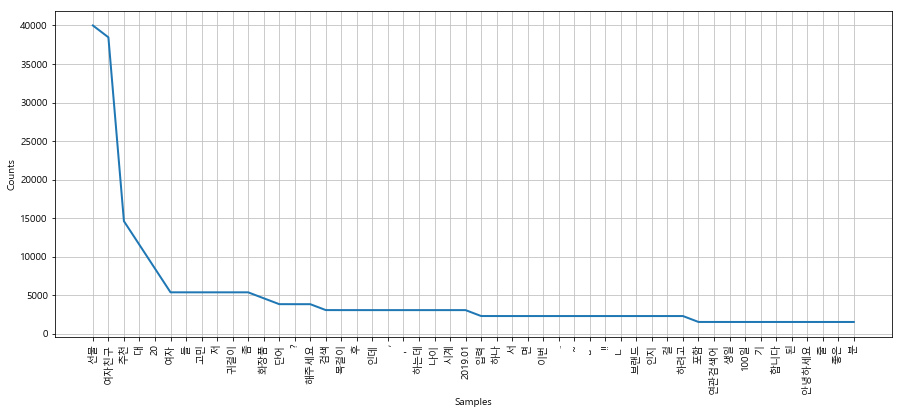

In [20]:
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

In [21]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

<function matplotlib.pyplot.show(*args, **kw)>

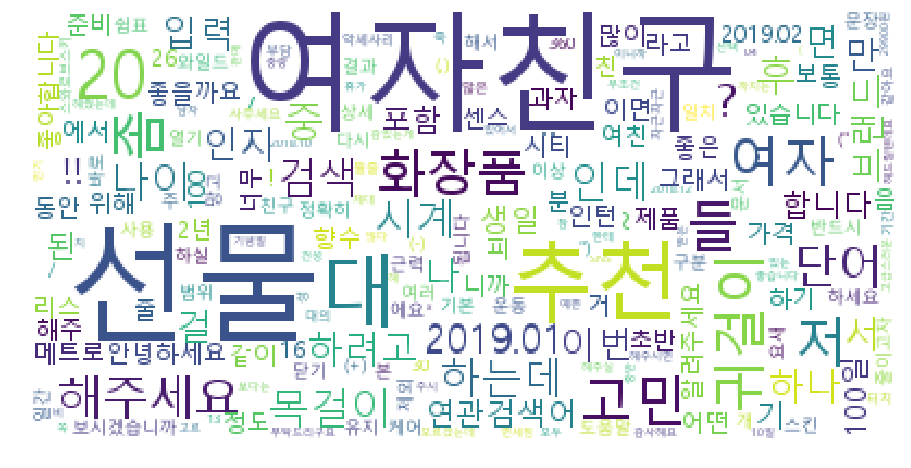

In [22]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.5,
                      background_color='white'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

#### gensim 사용하기 

In [23]:
import gensim
from gensim.models import word2vec

In [24]:
t = Okt()
results = []
lines = present_candi_text

for line in lines :
    malist = t.pos(line, norm=True, stem=True)
    r = []
    
    for word in malist :
        if not word[1] in ["Josa", "Eomi", "Punctuation"] :
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    
    print(r1)

기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 센스 좋다 것 2019.02 26 이번 20 대다 여자친구 선물 하다 하다 너무 똑같다 거 조금 센스 있다 뭘 선택 하다 하다 모르다 가격 부담 좀 없다 20 대다 여자친구 선물 좀 알다 답변 요새 기념일 많다 보 20 대다 여자친구 선물 저 이번 20 대다 여자친구 선물 사다 피 20 대다 여자친구 선물 하다 수 있다 정말 좋다 가격
질문 여자친구 선물 추천 해주다 분 4일 전 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019.01 16 여자친구 선물 하다 위해 귀걸이 알아보다 있다 여기저기 여자친구 선물 해주다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위해 오랜 기간 고민 하다 제 친하다 

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 메트로 시티 귀걸이 2019.02 17 여자친구 선물 메트로 시티 귀걸이 해주다 26 살다 요즘 20 대 중반 여자 들 어떻다 브랜드 선호 하나 싶다 악세사리 류 스와로브스키 답변 여자 분 그 나이 대 사회생활 하다 나이 실버 14 k 로 많다 http://naver.me/GCOhtUE8 링 귀걸이 원 터치 중량 가다 좋다 브랜드 들 가성 비
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후 나
질문 여자친구 선물 추천 좀 해주다 2019.01 16 여자친구 선물 추천 좀 해주다 여행 가다 면세점 선물 하나 사오다 뭐 좋다 화장품 쪽 생각 중 추천

In [25]:
data_file = 'pres_girl.data'

with open(data_file, 'w', encoding='utf=8') as fp :
    fp.write("\n".join(results))

In [26]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)

model.save('pres_girl.data')

In [27]:
model = word2vec.Word2Vec.load("pres_girl.data")

In [28]:
model.most_similar(positive=['선물'])

C:\Users\guseo\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.6186221837997437),
 ('있다', 0.3463888168334961),
 ('저', 0.28114020824432373),
 ('추천', 0.25872164964675903),
 ('목걸이', 0.2574727237224579),
 ('좀', 0.23631936311721802),
 ('그래서', 0.23401100933551788),
 ('운동', 0.22313407063484192),
 ('좋아하다', 0.22004443407058716),
 ('질문', 0.21986646950244904)]

In [29]:
model.most_similar(positive=['여자친구'])

C:\Users\guseo\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.6186221837997437),
 ('저', 0.2986130714416504),
 ('고르다', 0.2916129231452942),
 ('추천', 0.2616466283798218),
 ('질문', 0.2594658434391022),
 ('제', 0.25125694274902344),
 ('제품', 0.2467067688703537),
 ('대다', 0.24051955342292786),
 ('있다', 0.2285509556531906),
 ('해주다', 0.2233811467885971)]

In [31]:
model.most_similar(positive=['스와로브스키', '목걸이'])

C:\Users\guseo\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('류', 0.6513493657112122),
 ('악세사리', 0.606266438961029),
 ('그', 0.5741356015205383),
 ('사회생활', 0.5240857601165771),
 ('시계', 0.5054471492767334),
 ('선호', 0.5019614696502686),
 ('여자', 0.46830466389656067),
 ('k', 0.46008265018463135),
 ('실버', 0.4517660140991211),
 ('어떻다', 0.4400155246257782)]

In [33]:
model.most_similar(positive=['스와로브스키'], negative=['여자친구'])

C:\Users\guseo\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('류', 0.609494686126709),
 ('악세사리', 0.5413839817047119),
 ('그', 0.5309629440307617),
 ('사회생활', 0.5273401737213135),
 ('실버', 0.41582515835762024),
 ('14', 0.38351577520370483),
 ('어떻다', 0.3766292631626129),
 ('분', 0.3656280040740967),
 ('선호', 0.3420480489730835),
 ('중반', 0.3359562158584595)]